In [70]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, AveragePooling2D
from tensorflow.keras.datasets import fashion_mnist

In [71]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Turn off scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

RANDOM_SEED =4299
np.random.seed(RANDOM_SEED)
#torch.manual_seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [72]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [73]:
X_train = train_data.astype('float32') / 255
X_test = test_data.astype('float32') / 255 

In [74]:
X_train.shape

(60000, 28, 28)

In [75]:
train_label.shape

(60000,)

input_shape is a tuple telling the model about the shape of the input it will be getting. Note that instead of (28 x 28) we have the shape as (28 x 28 x 1). This is necessary because 2D CNNs accept 3D input tensors. Since our images are grayscale we need to add a dimension at the end. If our images were colored then their shape would be (28 x 28 x 3), 3 because there are 3 color channels Red, Green and Blue. Note that tensorflow backend of Keras expects input shape to be in format (height x width x channels), theano backend expects input shape to be (channels x height x width). Other backends like CNTK may have their own format so you should check and adjust accordingly.

In [76]:
input_shape = (X_train.shape[1:] + (1,)) # (28, 28, 1)
num_classes = len(np.unique(y_train)) 
print('input shape: ', input_shape)
print('# of classes', num_classes)

input shape:  (28, 28, 1)
# of classes 10


In [77]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [78]:
def create_model():
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(units=num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [79]:
model = create_model()

In [80]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [88]:
# When calling the fit function, we add 1 dimension at the end so that our 
# input shape becomes (60000, 28, 28, 1) instead of (60000, 28, 28).
history = model.fit(np.expand_dims(X_train, -1), y_train,
         epochs=10,
         batch_size=32,
         validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 52s 958us/sample - loss: 0.0634 - accuracy: 0.9769 - val_loss: 0.2896 - val_accuracy: 0.9268
Epoch 2/10
54000/54000 [==============================] - 52s 963us/sample - loss: 0.0609 - accuracy: 0.9774 - val_loss: 0.2638 - val_accuracy: 0.9302
Epoch 3/10
54000/54000 [==============================] - 50s 935us/sample - loss: 0.0576 - accuracy: 0.9793 - val_loss: 0.3272 - val_accuracy: 0.9235
Epoch 4/10
54000/54000 [==============================] - 51s 940us/sample - loss: 0.0531 - accuracy: 0.9802 - val_loss: 0.3034 - val_accuracy: 0.9302
Epoch 5/10
54000/54000 [==============================] - 53s 984us/sample - loss: 0.0522 - accuracy: 0.9809 - val_loss: 0.3154 - val_accuracy: 0.9265
Epoch 6/10
54000/54000 [==============================] - 53s 974us/sample - loss: 0.0442 - accuracy: 0.9837 - val_loss: 0.3287 - val_accuracy: 0.9320
Epoch 7/10
54000/54000 [=====================

In [89]:
loss, accuracy = model.evaluate(np.expand_dims(X_test, -1), y_test)

10000/10000 [==============================] - 2s 236us/sample - loss: 0.3877 - accuracy: 0.9216


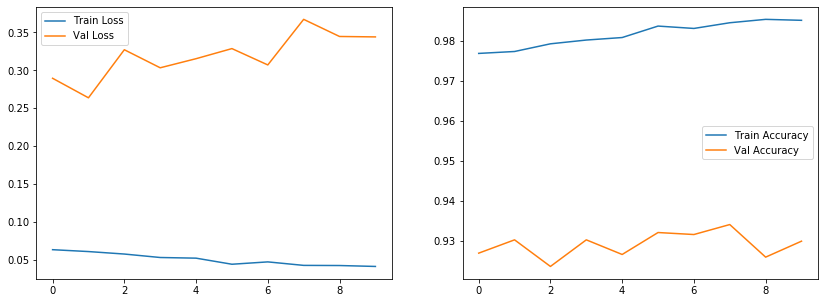

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
ax2.legend()